In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import metrics
# ML Algorithms
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

In [226]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("./data/mm.data") #load train data
df.columns = ['BI-RADS', 'Age','Shape','Margin','Density','Severity']
#df_train,df_test = train_test_split(df, train_size=0.7,test_size=0.3, random_state=42)
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null object
Age         960 non-null object
Shape       960 non-null object
Margin      960 non-null object
Density     960 non-null object
Severity    960 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [228]:
df.describe()

,Severity
count,960.000000
mean,0.462500
std,0.498852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [229]:
dt=df.replace('?', np.nan)
dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,NaN,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,NaN,1
4,4,65,1,NaN,3,0


In [230]:
percent1 = dt.isnull().sum()/dt.isnull().count()*100
percent2 = (round(percent1, 1)).sort_values(ascending=False)
missingData = pd.concat([total, percent2], axis=1, keys=['Total', '%'])
missingData.head()

,Total,%
Density,76,7.9
Margin,48,5.0
Shape,31,3.2
Age,5,0.5
BI-RADS,2,0.2


In [231]:
dt['Density'] = dt['Density'].replace(np.nan, 100)
dt['Density']=dt['Density'].astype(int)

dt['Margin'] = dt['Margin'].replace(np.nan, 100)
dt['Margin']=dt['Margin'].astype(int)

dt['Shape'] = dt['Shape'].replace(np.nan, 100)
dt['Shape']=dt['Shape'].astype(int)


dt['Age'] = dt['Age'].replace(np.nan, 100)
dt['Age']=dt['Age'].astype(int)


dt['BI-RADS'] = dt['BI-RADS'].replace(np.nan, 0)
dt['BI-RADS']=dt['BI-RADS'].astype(int)


dt.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4,43,1,1,100,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,100,1
4,4,65,1,100,3,0


In [232]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 6 columns):
BI-RADS     960 non-null int64
Age         960 non-null int64
Shape       960 non-null int64
Margin      960 non-null int64
Density     960 non-null int64
Severity    960 non-null int64
dtypes: int64(6)
memory usage: 45.1 KB


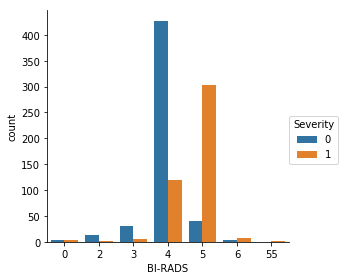

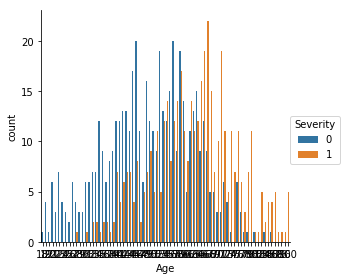

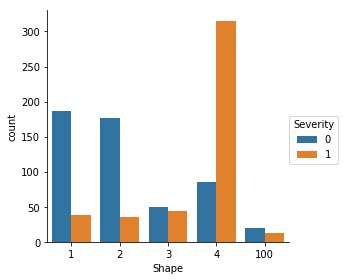

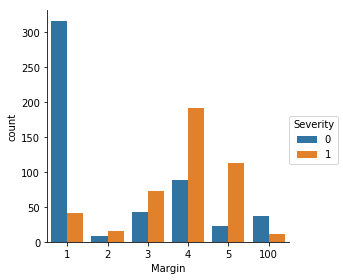

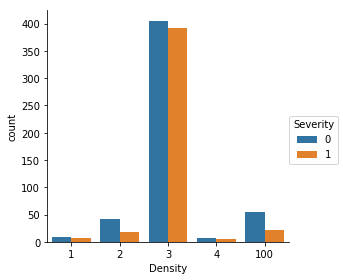

In [233]:
df_plot=dt
sns.factorplot('BI-RADS', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Age', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Shape', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Margin', data = df_plot, kind = 'count', hue='Severity')
sns.factorplot('Density', data = df_plot, kind = 'count', hue='Severity')


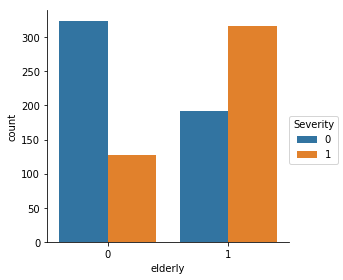

In [234]:
dt['elderly'] = np.where(dt['Age']<=55, 0,1)
sns.factorplot('elderly', data = df_plot, kind = 'count', hue='Severity')

In [235]:
#dt.groupby('elderly').count()
print(min(dt['Age']))
print(max(dt['Age']))

18
100


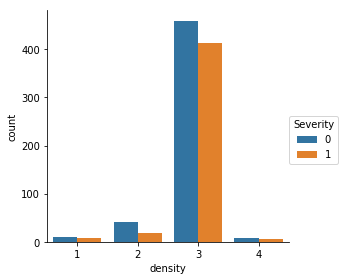

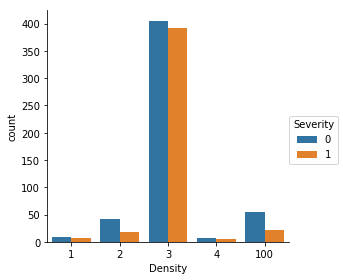

In [236]:
dt['density'] = np.where(dt['Density']==100, 3,dt['Density'])
sns.factorplot('density', data = dt, kind = 'count', hue='Severity')
sns.factorplot('Density', data = dt, kind = 'count', hue='Severity')

#del dt['Density']

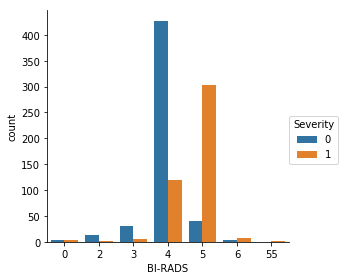

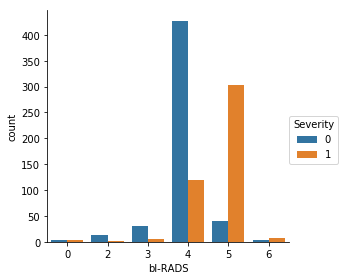

In [237]:
dt['bI-RADS'] = np.where(dt['BI-RADS']==100 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
dt['bI-RADS'] = np.where(dt['BI-RADS']==55 ,np.random.randint(low=1, high=6),dt['BI-RADS'])
sns.factorplot('BI-RADS', data = dt, kind = 'count', hue='Severity')
sns.factorplot('bI-RADS', data = dt, kind = 'count', hue='Severity')    

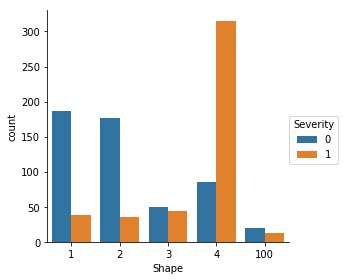

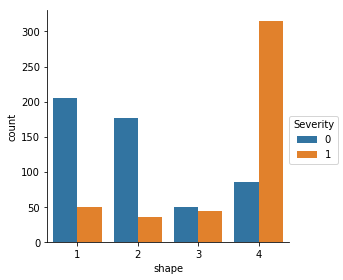

In [238]:
dt['shape'] = np.where(dt['Shape']==100,np.random.randint(low=0, high=5),dt['Shape'])
sns.factorplot('Shape', data = dt, kind = 'count', hue='Severity')
sns.factorplot('shape', data = dt, kind = 'count', hue='Severity')    

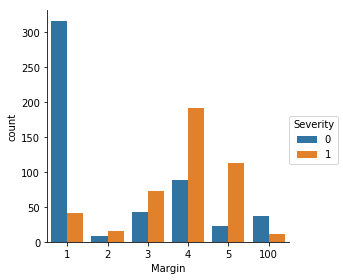

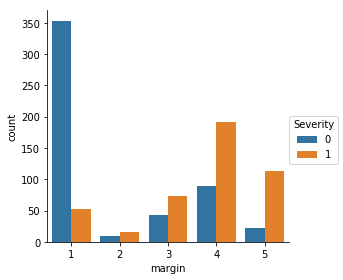

In [239]:
dt['margin'] = np.where(dt['Margin']==100,np.random.randint(low=0, high=6),dt['Margin'])
sns.factorplot('Margin', data = dt, kind = 'count', hue='Severity')
sns.factorplot('margin', data = dt, kind = 'count', hue='Severity')    

In [240]:
del dt['Density'] 
del dt['Margin']
del dt['Shape'] 
del dt['Age'] 
del dt['BI-RADS'] 
dt.head()

,Severity,elderly,density,bI-RADS,shape,margin
0,1,0,3,4,1,1
1,1,1,3,5,4,5
2,0,0,3,4,1,1
3,1,1,3,5,1,5
4,0,1,3,4,1,1
